# Load all required libraries

In [1]:
from skimage.filters import sobel, gaussian
from skimage import exposure
from skimage import restoration
from skimage import feature
from skimage.morphology import disk, binary_erosion, binary_dilation
from scipy.ndimage import binary_fill_holes
import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np
import argparse
import glob

# Define any and all functions to be used down the line

In [2]:
def plot_comparison(original, filtered, title_filtered):
    fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(10, 8), sharex=True, sharey=True)
    ax1.imshow(original, cmap=plt.cm.gray)
    ax1.set_title('original')
    ax1.axis('off')
    ax2.imshow(filtered, cmap=plt.cm.gray)
    ax2.set_title(title_filtered)
    ax2.axis('off')

In [3]:
def auto_canny(image, sigma=0.33):
    # compute the median of the single channel pixel intensities
    v = np.median(image)
    
    # apply automatic Canny edge detection using the computed median
    lower = int(max(0, (1.0 - sigma) * v))
    upper = int(min(255, (1.0 + sigma) * v))
    print(lower,",",upper)
    edged = cv.Canny(image, lower, upper)
    
    # return the edged image
    return edged

# Load the test image

In [4]:
img = plt.imread("/Users/rzende/Downloads/image-colorization/dm7.jpg")

In [5]:
img.shape

(833, 1280, 3)

This is a color image (3 layers), going forward we will use only the grayscale slice for evaluating the effect of modifications on it

# Try the sobel filter for edge detection

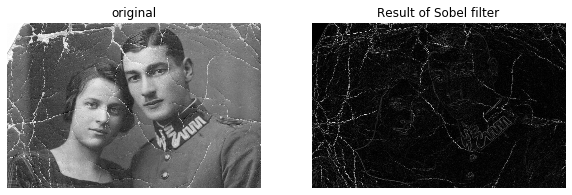

In [6]:
img_sobel = sobel(img[:,:,0], )
plot_comparison(img[:,:,0], img_sobel, "Result of Sobel filter")

# Try the gaussian filter for smoothing

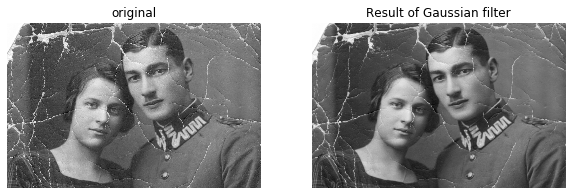

In [7]:
img_smooth = gaussian(img[:,:,0])
plot_comparison(img[:,:,0], img_smooth, "Result of Gaussian filter")

# Try the histogram equalization function

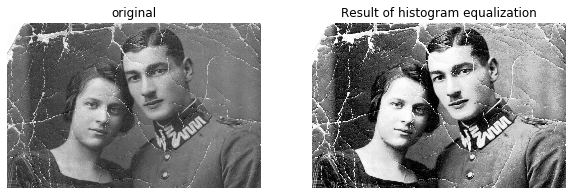

In [8]:
img_eqz = exposure.equalize_hist(img[:,:,0])
plot_comparison(img[:,:,0], img_eqz, "Result of histogram equalization")

This adjusts the contrast of our image!

# Try adaptive equalization function (Contrastive Limited Adaptive Histogram Equalization aka CLAHE)

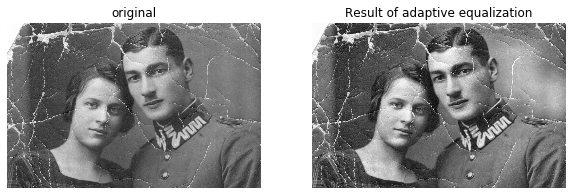

In [9]:
img_clahe = exposure.equalize_adapthist(img[:,:,0], clip_limit=0.006)
plot_comparison(img[:,:,0],img_clahe, "Result of adaptive equalization")

We can control the contrast adjustment, based on the clipping limit - to suit our requirement :)

# Try the TV denoising function 

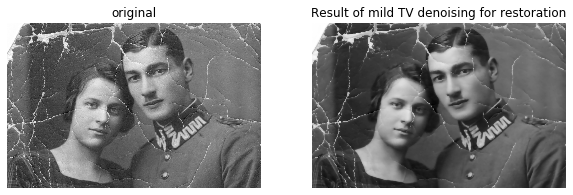

In [10]:
img_tv_denoise = restoration.denoise_tv_chambolle(img[:,:,0], weight=0.1)
plot_comparison(img[:,:,0],img_tv_denoise, "Result of mild TV denoising for restoration")

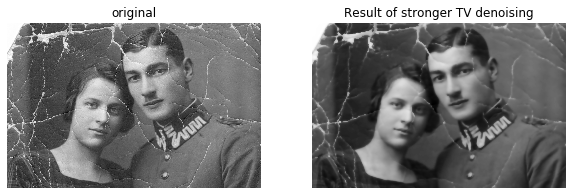

In [11]:
img_tv_denoise = restoration.denoise_tv_chambolle(img[:,:,0], weight=0.3)
plot_comparison(img[:,:,0],img_tv_denoise, "Result of stronger TV denoising")

As we can see here, the denoising happens at the cost of fidelity

# Try inpainting using skimage

79 , 158


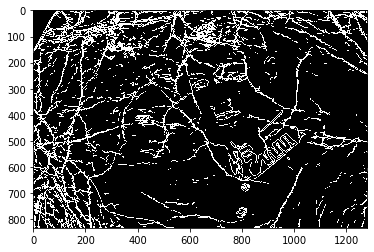

In [12]:
#mask = cv.Canny(img[:,:,0],200,255)
mask = auto_canny(img[:,:,0])
mask_dilated = binary_dilation(mask, disk(1))
plt.imshow(mask_dilated, cmap="gray")

This is our mask - we will use this for inpainting - next

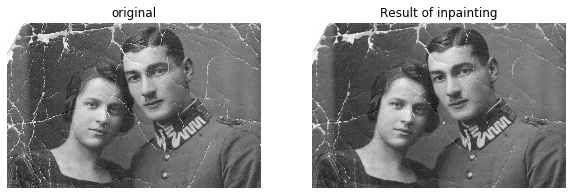

In [13]:
img_inpaint = restoration.inpaint_biharmonic(image=img[:,:,0], mask=mask_dilated, multichannel=False)
plot_comparison(img[:,:,0],img_inpaint, "Result of inpainting")